In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/south-korean-pollution/south-korean-pollution-data.csv
/kaggle/input/south-korean-pollution/south_korean_weather.csv


In [2]:
df = pd.read_csv('../input/south-korean-pollution/south-korean-pollution-data.csv')
df.head()

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,Lat,Long,City,District,Country
0,0,2022/2/1,112,31,35,2,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
1,1,2022/2/2,92,21,35,2,1,0,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
2,2,2022/2/3,60,20,35,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
3,3,2022/2/4,51,27,33,1,1,4,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea
4,4,2022/2/5,57,24,27,2,1,5,38.2089,127.9495,Bangsan-Myeon,Gangwon,South Korea


In [3]:
new_df = df.drop(columns=['Unnamed: 0','date','City','District', 'Country'])
new_df.head()


,pm25,pm10,o3,no2,so2,co,Lat,Long
0,112,31,35,2,1,4,38.2089,127.9495
1,92,21,35,2,1,0,38.2089,127.9495
2,60,20,35,1,1,4,38.2089,127.9495
3,51,27,33,1,1,4,38.2089,127.9495
4,57,24,27,2,1,5,38.2089,127.9495


In [4]:
new_df.describe()

,pm25,pm10,o3,no2,so2,co,Lat,Long
count,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000,34530.000000
mean,53.224616,34.757428,34.506371,14.802114,3.553084,4.548422,37.022716,127.247759
std,39.952008,21.046112,17.393329,11.479781,2.963608,2.966530,0.919155,0.613795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.059900,126.138700
25%,20.000000,22.000000,23.000000,6.000000,2.000000,3.000000,36.410900,126.896900
50%,55.000000,32.000000,32.000000,12.000000,3.000000,4.000000,37.132400,127.059200
75%,78.000000,45.000000,43.000000,21.000000,5.000000,6.000000,37.757700,127.716100
max,220.000000,685.000000,152.000000,85.000000,110.000000,281.000000,38.208900,130.821700


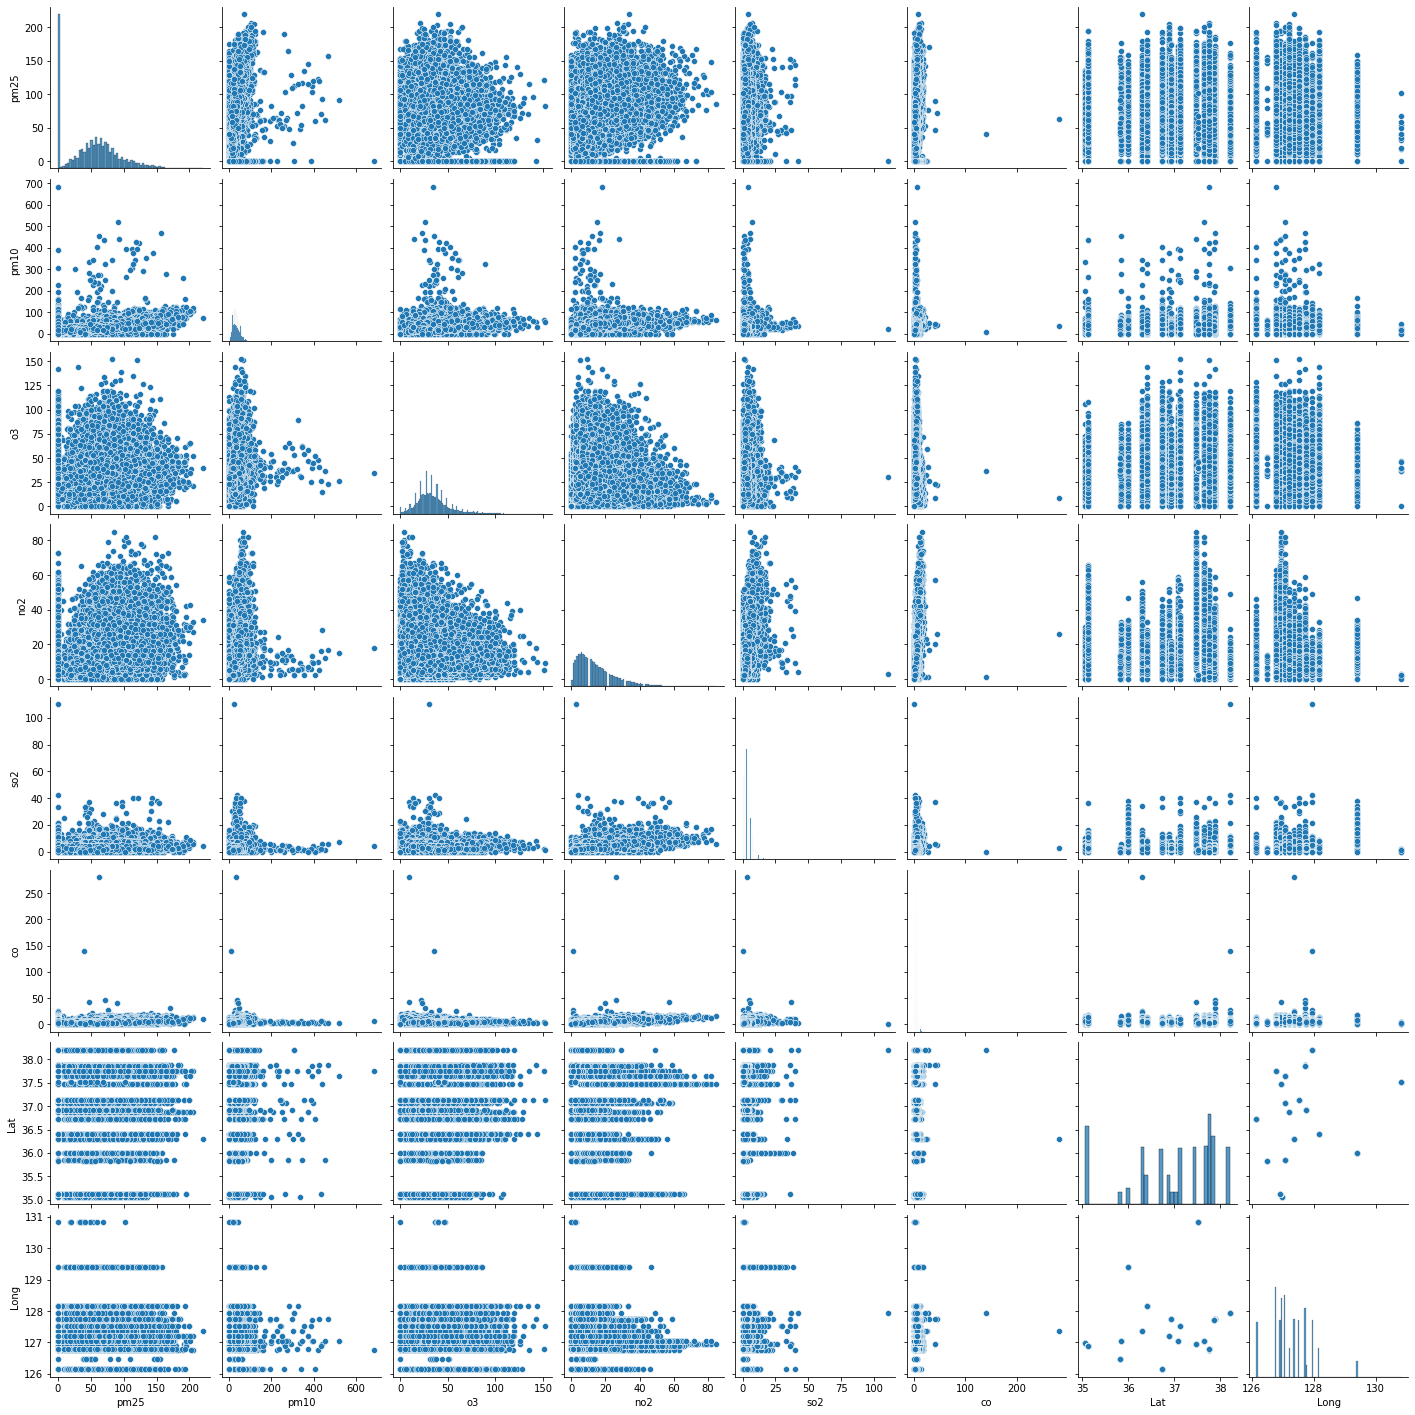

In [5]:
sns.pairplot(new_df)

In [6]:
Y = new_df.pm25
Y

0        112
1         92
2         60
3         51
4         57
        ... 
34525     49
34526    102
34527     59
34528     41
34529      0
Name: pm25, Length: 34530, dtype: int64

In [7]:
X = new_df.drop(['pm25'], axis=1)
X

,pm10,o3,no2,so2,co,Lat,Long
0,31,35,2,1,4,38.2089,127.9495
1,21,35,2,1,0,38.2089,127.9495
2,20,35,1,1,4,38.2089,127.9495
3,27,33,1,1,4,38.2089,127.9495
4,24,27,2,1,5,38.2089,127.9495
...,...,...,...,...,...,...,...
34525,43,46,3,1,4,37.5082,130.8217
34526,24,39,2,0,3,37.5082,130.8217
34527,15,40,2,0,0,37.5082,130.8217
34528,0,0,0,0,0,37.5082,130.8217


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()

In [10]:
model.fit(X_train, Y_train)

LinearRegression()

In [11]:
Y_pred = model.predict(X_test)

In [12]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [ 0.34477582 -0.03748515  0.795856   -0.57970098  0.39404323 -2.08486581
  2.16460085]
Intercept: -167.13319597404885
Mean squared error (MSE): 1442.28
Coefficient of determination (R^2): 0.11
